## Examples

### Basic Usage

#### MLE

In [1]:
import kldmwr.univar
import scipy.stats


def norm_pdf(x, p):
    return scipy.stats.norm.pdf(x, loc=p[0], scale=p[1])


x = [0.12, -0.62, 1.16, -0.31, -0.02, -0.99, -0.45,  0.17]
p_i = [0, 1]
res = kldmwr.univar.find_mle(x, p_i, norm_pdf)
print(res[0])
print(res)


[-0.11747087  0.60645557]
(array([-0.11747087,  0.60645557]), 7.350032644753719, True,  final_simplex: (array([[-0.11747087,  0.60645557],
       [-0.11748272,  0.60636968],
       [-0.11740537,  0.60641523]]), array([7.35003264, 7.35003266, 7.3500327 ]))
           fun: 7.350032644753719
       message: 'Optimization terminated successfully.'
          nfev: 103
           nit: 54
        status: 0
       success: True
             x: array([-0.11747087,  0.60645557]))


#### ZGE (Zero-boundary Galerkin Estimator) or JMMPSE (Jiang's modified MPS estimator)

In [1]:
import kldmwr.univar
import scipy.stats


def norm_cdf(x, p):
    return scipy.stats.norm.cdf(x, loc=p[0], scale=p[1])


x = [0.12, -0.62, 1.16, -0.31, -0.02, -0.99, -0.45,  0.17]
p_i = [0, 1]
res = kldmwr.univar.find_zge(x, p_i, norm_cdf)
print(res[0])


[-0.13663485  0.62631407]


#### NGE (Nonzero-boundary Galerkin estimator) or MPSE (traditionl one) 

In [3]:
import kldmwr.univar
import scipy.stats


def norm_cdf(x, p):
    return scipy.stats.norm.cdf(x, loc=p[0], scale=p[1])


x = [0.12, -0.62, 1.16, -0.31, -0.02, -0.99, -0.45,  0.17]
p_i = [0, 1]
res = kldmwr.univar.find_nge(x, p_i, norm_cdf)
print(res[0])


[-0.11059383  0.80750186]


### Advanced Usage


#### Giving varying initial values of parameters.

* $\texttt{p_is}$

In [5]:
import kldmwr.univar
import numpy as np
import scipy.stats


def gev_cdf(y, p):

    if p[2] * p[2] < 1e-25:
        return np.exp(- np.exp(- (y - p[0]) / p[1]))
    else:
        return np.exp(- (1. + p[2] * (y - p[0]) / p[1]) ** (- 1.0 / p[2]))


x = [-0.29505663, -0.10061241,  0.93107122,  1.25161993,  1.31516917,
     1.39300232,  1.42739514,  1.49512478,  1.49936167, 1.49981574]
p_0 = np.array([1, 1, -2])

################################################################################
# initial values of parameters, p_is

n_gen = 50
n_int = 20
mu_pls = np.random.uniform(0, .4, size=n_gen)
sg_pls = np.random.uniform(-0.5, 0.5, size=n_gen)
p_0t = p_0.reshape(3, 1)
p_0s = np.repeat(p_0t, n_gen, axis=1)
p_gs = p_0s + np.array([mu_pls, sg_pls, np.zeros(n_gen)]) 
p_gs = p_gs.transpose()
p_gsels = []
for p_g in p_gs:
    if 1 + p_g[2] * (x[-1] - p_g[0]) / p_g[1] > 0 and\
        1 + p_g[2] * (x[0] - p_g[0]) / p_g[1] > 0:
        p_gsels.append(p_g)

p_is = np.array(p_gsels)
p_is = p_is[:n_int]

################################################################################

res_a = kldmwr.univar.find_min_viv_expl(
    x, p_0, kldmwr.univar.find_zge, gev_cdf,
    p_ints=p_is
)

print('res_a[0]', res_a[0])
df = res_a[3]
df

/home/takuya/pyenvs/webtknuc/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


res_a[0] [ 1.2789668   0.56955288 -2.57856013]


,loc,scl,shp,mmps,success,p_i_loc,p_i_scl,p_i_shp
0,1.128439,0.978777,-2.635329,26.858604,1.0,1.262459,0.879185,-2.0
1,1.051342,1.269259,-2.830037,27.044053,1.0,1.386191,1.181874,-2.0
2,1.266616,0.643968,-2.761158,26.704672,1.0,1.010063,1.392162,-2.0
3,1.309990,0.433880,-2.285060,26.809788,1.0,1.385964,0.513392,-2.0
4,1.221295,0.579665,-2.080654,26.942873,1.0,1.019105,1.368885,-2.0
5,1.277672,0.568526,-2.558898,26.673897,1.0,1.123804,0.781915,-2.0
6,1.092666,0.889776,-2.185038,27.044620,1.0,1.189926,1.430417,-2.0
7,1.211938,0.809084,-2.810292,26.774039,1.0,1.127606,1.338388,-2.0
8,1.280195,0.585939,-2.667630,26.679902,1.0,1.339083,1.441803,-2.0
9,1.286299,0.534213,-2.501555,26.680964,1.0,1.059194,1.474156,-2.0


Text(0, 0.5, '$\\hat \\sigma$')

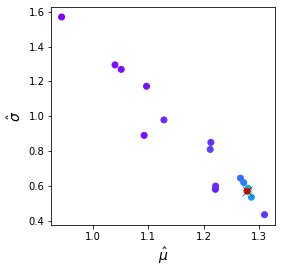

In [6]:
import matplotlib.pyplot as plt


cm = plt.cm.get_cmap('rainbow')
dfs = df.sort_values('mmps', ascending=False)

fig, ax1 = plt.subplots(figsize=(4, 4))
ax1.scatter(dfs['loc'], dfs['scl'], marker='o', 
           c= -np.log(1 + 1e-9 - (dfs['mmps'].max() - dfs['mmps']) / (dfs['mmps'].max() - dfs['mmps'].min())), 
           cmap=cm)

ax1.scatter(res_a[0][0], res_a[0][1], marker='x', s=100, lw=.5, c='k') 
ax1.set_xlabel('$\hat \mu$', fontsize=14)
ax1.set_ylabel('$\hat \sigma$', fontsize=14)